# 2.2 Merging DEC with LBSM (Public Buildings)

<hr style="border:2px solid black">

# Outline <a id='index'></a>
1. [Introduction](#1)
1. [Data Visualization and Cleaning](#2)
    * [2.1 Categorical Data Analysis](#2.1)
    * [2.2 Continous Data Analysis](#2.2)
1. [Convert Categorical to Numerical](#3)
1. [Conclusion](#4)
1. [Reference](#5)


<hr style="border:2px solid black">

# 1. Introduction [^](#index) <a name="1"></a> 

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;Firstly, the cleaned data from DEC is filtered between the years
2017 and 2023 and merged with data from LBSM. DEC data has 42724 rows with 45 columns, while
LBSM has 4.7 million rows with 43 columns. After merging, there are 23622 rows with 87 columns.
Most of the NAN values are from LBSM features. Features with more than 40% NAN values are dropping first
since most of them are helpful with data for non-domestic buildings. Features that have NAN less than 22% 
are cleaned and saved in the main file at the end of the notebook.<div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cert= '/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/1.2_PB_1423_DEC.csv'
cert_df=pd.read_csv(cert)
cert_df

LMK_KEY  POSTCODE  \
0                       93750320042019030807472783410070   W12 7PT   
1                       93750320042020031613373084410070   W12 7PT   
2                       43059380342020031612160424700070   SW6 1JU   
3                       14635490802016112318511530710220   W12 0NN   
4                       56018680922016113014072810090210    W6 7NL   
...                                                  ...       ...   
42719  fccdc7152fc3eef260200a2e82bfcc5b0478e26cc3f353...  EC2V 7EL   
42720  a1e1d6785ff801178fb6f52d52338eb9f8b6b41ae0202a...  EC1A 7BE   
42721  2cfb92f92a01babcc7ca53a374f2e52b1d04a7bd85806a...  EC1A 7BE   
42722  02f0eca29b945e4b057cbe8627d08cf681c5304a64db1f...  EC2Y 8EN   
42723  6ab973c7ba505763c1e765a984da2a14b176ebef543115...  EC4Y 8AP   

       BUILDING_REFERENCE_NUMBER  CURRENT_OPERATIONAL_RATING  \
0                   302052480001                       106.0   
1                   302052480001                        91.0   
2                   130568720000                        99.0   
3                   885459730001                       219.0   
4                   113582090000                        69.0   
...                          ...                         ...   
42719                10004389572                       105.0   
42720               558220410004                       199.0   
42721               558220410009                       202.0   
42722                10005342534                        61.0   
42723               991567250002                       108.0   

       YR1_OPERATIONAL_RATING  YR2_OPERATIONAL_RATING OPERATIONAL_RATING_BAND  \
0                       112.0                    95.0                       E   
1                       106.0                   112.0                       D   
2                       112.0                   121.0                       D   
3                       210.0                    88.5                       G   
4                        54.0                    56.0                       C   
...                       ...                     ...                     ...   
42719                   189.5                   169.5                       E   
42720                   190.0                   175.0                       G   
42721                   192.0                   177.0                       G   
42722                   140.5                    88.5                       C   
42723                    89.0                     0.0                       E   

       ELECTRIC_CO2  HEATING_CO2  RENEWABLES_CO2  ...   LOCAL_AUTHORITY_LABEL  \
0              69.0        128.0             0.0  ...  Hammersmith and Fulham   
1              69.0         99.0             0.0  ...  Hammersmith and Fulham   
2              61.0        104.0             0.0  ...  Hammersmith and Fulham   
3            2420.0        635.0             0.0  ...  Hammersmith and Fulham   
4             173.0         73.0            12.0  ...  Hammersmith and Fulham   
...             ...          ...             ...  ...                     ...   
42719        1202.0          0.0             0.0  ...          City of London   
42720         424.0        498.0           367.0  ...          City of London   
42721         275.0        324.0           238.0  ...          City of London   
42722          21.0         33.0             0.0  ...          City of London   
42723          71.0         30.0             0.0  ...          City of London   

                     CONSTITUENCY_LABEL POSTTOWN NOMINATED_DATE  \
0                           Hammersmith   LONDON     2019-03-02   
1                           Hammersmith   LONDON     2020-03-02   
2                    Chelsea and Fulham   LONDON     2020-02-28   
3                           Hammersmith   LONDON     2016-03-31   
4                           Hammersmith   LONDON     2016-12-01   
...                                 ...      ...            ...   
42719  Cities of London 

In [3]:
cert_df.columns

Index(['LMK_KEY', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER',
       'CURRENT_OPERATIONAL_RATING', 'YR1_OPERATIONAL_RATING',
       'YR2_OPERATIONAL_RATING', 'OPERATIONAL_RATING_BAND', 'ELECTRIC_CO2',
       'HEATING_CO2', 'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE',
       'LOCAL_AUTHORITY', 'CONSTITUENCY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'MAIN_HEATING_FUEL', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDING_CATEGORY', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'NOMINATED_DATE', 'OR_ASSESSMENT_END_DATE', 'LODGEMENT_DATETIME',
       'OCC

In [4]:
# Convert the date column to datetime (assuming the date column is named 'date')
cert_df['NOMINATED_DATE'] = pd.to_datetime(cert_df['NOMINATED_DATE'], errors='coerce')

# Check the minimum and maximum dates
min_date = cert_df['NOMINATED_DATE'].min()
max_date = cert_df['NOMINATED_DATE'].max()

min_date, max_date


(Timestamp('2009-10-01 00:00:00'), Timestamp('2024-02-29 00:00:00'))

In [5]:
# Select only years within LBSM data
new_yr  = cert_df[(cert_df['year'] >= 2017) & (cert_df['year'] <= 2023)]
new_yr.isnull().sum()

LMK_KEY                             0
POSTCODE                            0
BUILDING_REFERENCE_NUMBER           0
CURRENT_OPERATIONAL_RATING          0
YR1_OPERATIONAL_RATING              0
YR2_OPERATIONAL_RATING              0
OPERATIONAL_RATING_BAND             0
ELECTRIC_CO2                        0
HEATING_CO2                         0
RENEWABLES_CO2                      0
PROPERTY_TYPE                       0
INSPECTION_DATE                     0
LOCAL_AUTHORITY                     0
CONSTITUENCY                        0
LODGEMENT_DATE                      0
MAIN_BENCHMARK                      2
MAIN_HEATING_FUEL                   0
TOTAL_FLOOR_AREA                    0
ANNUAL_THERMAL_FUEL_USAGE           0
TYPICAL_THERMAL_FUEL_USAGE          0
ANNUAL_ELECTRICAL_FUEL_USAGE        0
TYPICAL_ELECTRICAL_FUEL_USAGE       0
RENEWABLES_FUEL_THERMAL             0
RENEWABLES_ELECTRICAL               0
YR1_ELECTRICITY_CO2              4773
YR2_ELECTRICITY_CO2                 0
YR1_HEATING_

In [16]:
data_2022 = new_yr[new_yr['year'] == 2021]# To check total number of public buildings in London

data_2022


LMK_KEY  POSTCODE  \
31     55a87d3c4af6b54d09abf2d2898956d1a433745af0ff0d...   W12 0HS   
64     5ed58e528da86b8e76705d82bb9f945b6321c07ed4ead6...   W12 7JA   
85     2b5be56df745f713dc8bbf708c0d1aa6d1ebf15d65b072...   W12 0HR   
94     615e486a66031e18647f255d8819c4dea0167a59d628c9...   SW6 2DL   
111    81aeb35c5a0f2f7c92487ffbca14124ddde3ff9845dfc8...   SW6 4UL   
...                                                  ...       ...   
42653  e69152fda0f0f2dfa4d6e63d54206f3ead6f0678ef8547...  EC1A 7BE   
42654  f805aeb67ca0078d414cdea4b414b9070dfa257116e705...  EC2Y 8EN   
42667  3d9084691bf3f75a331a96852d5d5adc8218d367c7cd48...  EC2R 8AH   
42668  d3b63ecd5bc4473086103470fd842d90bd9632521c7e9e...  EC2V 5AR   
42669  59563dc23efd2a0de0549f7d3045eac1bc848aa71a84b9...  EC1A 4AS   

       BUILDING_REFERENCE_NUMBER  CURRENT_OPERATIONAL_RATING  \
31                  591749140015                       105.0   
64                   10001318271                        81.0   
85                  387196220007                        82.0   
94                   10001316704                        69.0   
111                  10001317988                       131.0   
...                          ...                         ...   
42653               558220410005                       164.0   
42654                10000879359                        46.0   
42667                10000877593                       121.0   
42668                10001725044                        63.0   
42669               632411210001                        59.0   

       YR1_OPERATIONAL_RATING  YR2_OPERATIONAL_RATING OPERATIONAL_RATING_BAND  \
31                      108.0                   110.0                       E   
64                       94.0                    93.0                       D   
85                       46.0                    48.0                       D   
94                       81.0                    69.0                       C   
111                     129.0                   132.0                       F   
...                       ...                     ...                     ...   
42653                   188.0                   216.0                       G   
42654                   189.0                   212.5                       B   
42667                   113.0                   116.0                       E   
42668                    93.0                   103.5                       C   
42669                    73.0                    91.0                       C   

       ELECTRIC_CO2  HEATING_CO2  RENEWABLES_CO2  ...   LOCAL_AUTHORITY_LABEL  \
31            187.0        239.0             0.0  ...  Hammersmith and Fulham   
64            101.0         49.0             0.0  ...  Hammersmith and Fulham   
85            129.0         47.0             0.0  ...  Hammersmith and Fulham   
94             69.0         78.0             0.0  ...  Hammersmith and Fulham   
111           133.0         87.0             0.0  ...  Hammersmith and Fulham   
...             ...          ...             ...  ...                     ...   
42653         284.0        430.0             0.0  ...          City of London   
42654          23.0         19.0             0.0  ...          City of London   
42667        6309.0       1827.0             0.0  ...          City of London   
42668          33.0         43.0             0.0  ...          City of London   
42669          66.0         31.0             0.0  ...          City of London   

                     CONSTITUENCY_LABEL POSTTOWN NOMINATED_DATE  \
31                          Hammersmith   London     2020-09-30   
64                          Hammersmith   LONDON     2021-05-01   
85                          Hammersmith   LONDON     2021-06-30   
94                   Chelsea and Fulham   LONDON     2021-09-01   
111                  Chelsea and Fulham   LONDON     2021-03-31   
...                                 ...      ...            ...   
42653  Cities of London 

In [ ]:
new_yr

In [6]:
lbsm= '//home/ffs223/Downloads/GHGs_coding/London building stock model/LBSM_All_London.csv'
lbsm_df=pd.read_csv(lbsm)
lbsm_df

/tmp/ipykernel_86962/888663097.py:2: DtypeWarning: Columns (22,23,26,28,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  lbsm_df=pd.read_csv(lbsm)


UPRN        SCU_ID          OS_TOPO_TOID    EASTING  \
0            95510923  5.030100e+13     osgb1000005894597  532123.00   
1        100023615843  5.030100e+13     osgb1000005894597  532115.00   
2        200000071748  5.030100e+13     osgb1000005894760  532193.00   
3        200000071808  5.030100e+13     osgb1000005894760  532193.00   
4        200000071807  5.030100e+13     osgb1000005894760  532193.00   
...               ...           ...                   ...        ...   
4710938   10092984018           NaN  osgb5000005209443103  511128.51   
4710939       6041780           NaN     osgb1000041691013  535996.00   
4710940   10025698549           NaN  osgb5000005214105008  529149.52   
4710941       6160138           NaN  osgb5000005267263349  537621.77   
4710942   10001005092           NaN  osgb5000005212691931  532042.00   

          NORTHING   LATITUDE  LONGITUDE         OA       LSOA       MSOA  \
0        182028.00  51.521725  -0.096998  E00000010  E01000003  E02000001   
1        182025.00  51.521700  -0.097115  E00000010  E01000003  E02000001   
2        182074.00  51.522122  -0.095973  E00000012  E01000003  E02000001   
3        182074.00  51.522122  -0.095973  E00000012  E01000003  E02000001   
4        182074.00  51.522122  -0.095973  E00000012  E01000003  E02000001   
...            ...        ...        ...        ...        ...        ...   
4710938  185534.95  51.557762  -0.398365  E00012429  E01002497  E02006796   
4710939  183413.00  51.533252  -0.040674  E00021312  E01004234  E02000866   
4710940  192466.94  51.616224  -0.136000  E00007613  E01001534  E02000308   
4710941  179724.87  51.499716  -0.018689  E00167132  E01032772  E02006853   
4710942  166168.00  51.379215  -0.104080  E00005031  E01001013  E02000213   

         ... AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA  \
0        ...                                            NaN   
1        ...                                            NaN   
2        ...                                           63.0   
3        ...                                           63.0   
4        ...                                           63.0   
...      ...                                            ...   
4710938  ...                                            NaN   
4710939  ...                                            NaN   
4710940  ...                                            NaN   
4710941  ...                                            NaN   
4710942  ...                                            NaN   

        AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA  \
0                                              NaN   
1                                              NaN   
2                                                D   
3                                                D   
4                                                D   
...                                            ...   
4710938                                        NaN   
4710939                                        NaN   
4710940                                        NaN   
4710941                                        NaN   
4710942                                        NaN   

        AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT  \
0                                                NaN   
1                                                NaN   
2                                               71.0   
3                                               71.0   
4                                               71.0   
...                                              ...   
4710938                                          NaN   
4710939                                          NaN   
4710940                                          NaN   
4710941                                          NaN   
4710942                                          NaN   

        AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT  \
0                                            NaN   
1                                           

In [7]:
#lbsm_df.drop('Unnamed: 0', axis=1,inplace=True)
lbsm_df.isnull().sum()

UPRN                                                          0
SCU_ID                                                   511608
OS_TOPO_TOID                                                  0
EASTING                                                       0
NORTHING                                                      0
LATITUDE                                                      0
LONGITUDE                                                     0
OA                                                         4558
LSOA                                                       4558
MSOA                                                       4558
OAC                                                        4558
WARD_CODE                                                  4558
WARD                                                       4558
ADMINISTRATIVE_AREA                                           0
ESTIMATED_FLOOR_COUNT                                    670104
ESTIMATE_TOTAL_FLOOR_AREA_ALL           

In [8]:
merged= pd.merge(new_yr, lbsm_df, on="UPRN", how="inner")
merged

LMK_KEY  POSTCODE  \
0                       93750320042019030807472783410070   W12 7PT   
1                       93750320042020031613373084410070   W12 7PT   
2                       93750320002017032711260082410270   W12 7PT   
3                       93750350062018031211164904220831   W12 7PT   
4      2909a74c40c34a1861521f2a2f1b259682bd49ecfec4e8...   W12 7PT   
...                                                  ...       ...   
23617  d67a2b45db159469c5cb58eeac510fb57cb0c7bf713f66...    E1 7BS   
23618  e8e8fc53ca150f627df1c06f5995555b3be47823bfacbe...  EC4M 7EH   
23619  f40f825570335afe5507632b7b9100de6d749b91534c45...  EC3A 5DE   
23620  c3a18b3b9288cc2196ea5107af9b797c32f2c85ba56d53...  EC3A 5DE   
23621  354aee9f97903fc50182d45864059cae331ad14dabffcb...  EC3M 3BY   

       BUILDING_REFERENCE_NUMBER  CURRENT_OPERATIONAL_RATING  \
0                   302052480001                       106.0   
1                   302052480001                        91.0   
2                   302052480001                        95.0   
3                   302052480001                       112.0   
4                    10000869430                        88.0   
...                          ...                         ...   
23617                10003826584                       124.0   
23618                10004947247                        83.0   
23619                10003826866                        74.0   
23620                10003826866                        82.0   
23621                10004530415                       162.0   

       YR1_OPERATIONAL_RATING  YR2_OPERATIONAL_RATING OPERATIONAL_RATING_BAND  \
0                       112.0                    95.0                       E   
1                       106.0                   112.0                       D   
2                        95.0                    95.0                       D   
3                        95.0                   104.5                       E   
4                        91.0                   106.0                       D   
...                       ...                     ...                     ...   
23617                   161.0                   113.0                       E   
23618                   100.5                    71.5                       D   
23619                    97.0                    85.0                       C   
23620                    74.0                    97.0                       D   
23621                   190.0                   170.5                       G   

       ELECTRIC_CO2  HEATING_CO2  RENEWABLES_CO2  ...  \
0              69.0        128.0             0.0  ...   
1              69.0         99.0             0.0  ...   
2              86.0         97.0             0.0  ...   
3              89.0        118.0             0.0  ...   
4              61.0         99.0             0.0  ...   
...             ...          ...             ...  ...   
23617          37.0          0.0             0.0  ...   
23618        1521.0        462.0             0.0  ...   
23619          81.0         54.0             0.0  ...   
23620          92.0         60.0             0.0  ...   
23621         240.0         29.0             0.0  ...   

      AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
23617                                           71.0   
23618                                            NaN   
23619                                            NaN   
23620                                            NaN   
23621                                           88.0   

      AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA  \
0                                            NaN   
1   

In [9]:
def plot_nan(nan_df, total_rows, title,colour=None):

    # Calculate the percentage of NaN values
    nan_df['NaN_%'] = (nan_df['NaN_Count'] / total_rows) * 100
    
    # Plotting
    plt.figure(figsize=(5, 3), dpi=500)
    bars = plt.barh(nan_df['Column'], nan_df['NaN_%'], color=colour)
    plt.xlabel('Percentage of NaN values',fontsize=8)
    plt.title(title, fontsize=10)
    plt.grid(axis='x')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=6)

    # Visualize percentage value at the right side of the bar
    for bar in bars:
        w = bar.get_width()
        label = f'{w:.1f}%'
        plt.text(w + 0.5, bar.get_y() + bar.get_height() / 2, label, va='center', fontsize=6, color='black')

   
    plt.show()

In [10]:
#Checking for NAN for more than 10 columns
Nan=merged.isnull()

for column in Nan.columns.values.tolist():
    print(column)
    print (Nan[column].value_counts())
    print("") 

LMK_KEY
LMK_KEY
False    23622
Name: count, dtype: int64

POSTCODE
POSTCODE
False    23622
Name: count, dtype: int64

BUILDING_REFERENCE_NUMBER
BUILDING_REFERENCE_NUMBER
False    23622
Name: count, dtype: int64

CURRENT_OPERATIONAL_RATING
CURRENT_OPERATIONAL_RATING
False    23622
Name: count, dtype: int64

YR1_OPERATIONAL_RATING
YR1_OPERATIONAL_RATING
False    23622
Name: count, dtype: int64

YR2_OPERATIONAL_RATING
YR2_OPERATIONAL_RATING
False    23622
Name: count, dtype: int64

OPERATIONAL_RATING_BAND
OPERATIONAL_RATING_BAND
False    23622
Name: count, dtype: int64

ELECTRIC_CO2
ELECTRIC_CO2
False    23622
Name: count, dtype: int64

HEATING_CO2
HEATING_CO2
False    23622
Name: count, dtype: int64

RENEWABLES_CO2
RENEWABLES_CO2
False    23622
Name: count, dtype: int64

PROPERTY_TYPE
PROPERTY_TYPE
False    23622
Name: count, dtype: int64

INSPECTION_DATE
INSPECTION_DATE
False    23622
Name: count, dtype: int64

LOCAL_AUTHORITY
LOCAL_AUTHORITY
False    23622
Name: count, dtype: int64

CO

In [95]:
nan_pb= { 
    
    'ADDRESS2':474,'ADDRESS3':4985,
    'POSTTOWN':3,'SCU_ID':1871,'ESTIMATED_FLOOR_COUNT':3881,
    'ESTIMATE_TOTAL_FLOOR_AREA_ALL':2255,'SCU_FOOTPRINT':2255,
    'MEAN_OBJECT_HEIGHT_M':2581,'BASEMENT_FLOOR':22185,
    'COUNT_D_UPRNS':18216,'COUNT_ND_UPRNS':4010,
    'MIX_CLASS':4400,'DOMINANT_ND_ACTIVITY_BY_C2_FS':19524,
    'DOMINANT_ND_ACTIVITY_BY_C2_COUNT':5183, 
    
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT':10571,
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT':10571,
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA':10571,
      'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA':10571,
    
     'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT':17725,
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT ':17725,
    'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA': 17727,
      'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA':17727,
    
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT':21187,
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT':21187,
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA':21192,
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA':21192,
    
       'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT':5172,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT':5172,
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA':16132,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA':16132,
    }

nan_pbdf = pd.DataFrame(list(nan_pb.items()), columns=['Column', 'NaN_Count'])#convert nan list into data frame:create col in the df
nan_pbdf

Column  NaN_Count
0                                            ADDRESS2        474
1                                            ADDRESS3       4985
2                                            POSTTOWN          3
3                                              SCU_ID       1871
4                               ESTIMATED_FLOOR_COUNT       3881
5                       ESTIMATE_TOTAL_FLOOR_AREA_ALL       2255
6                                       SCU_FOOTPRINT       2255
7                                MEAN_OBJECT_HEIGHT_M       2581
8                                      BASEMENT_FLOOR      22185
9                                       COUNT_D_UPRNS      18216
10                                     COUNT_ND_UPRNS       4010
11                                          MIX_CLASS       4400
12                      DOMINANT_ND_ACTIVITY_BY_C2_FS      19524
13                   DOMINANT_ND_ACTIVITY_BY_C2_COUNT       5183
14        AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT      10571
15   AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT      10571
16    AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA      10571
17  AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLO...      10571
18         AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT      17725
19            AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT       17725
20     AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA      17727
21         AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA      17727
22       AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT      21187
23           AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT      21187
24   AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA      21192
25       AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA      21192
26       AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT       5172
27           AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT       5172
28   AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA      16132
29       AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA      16132

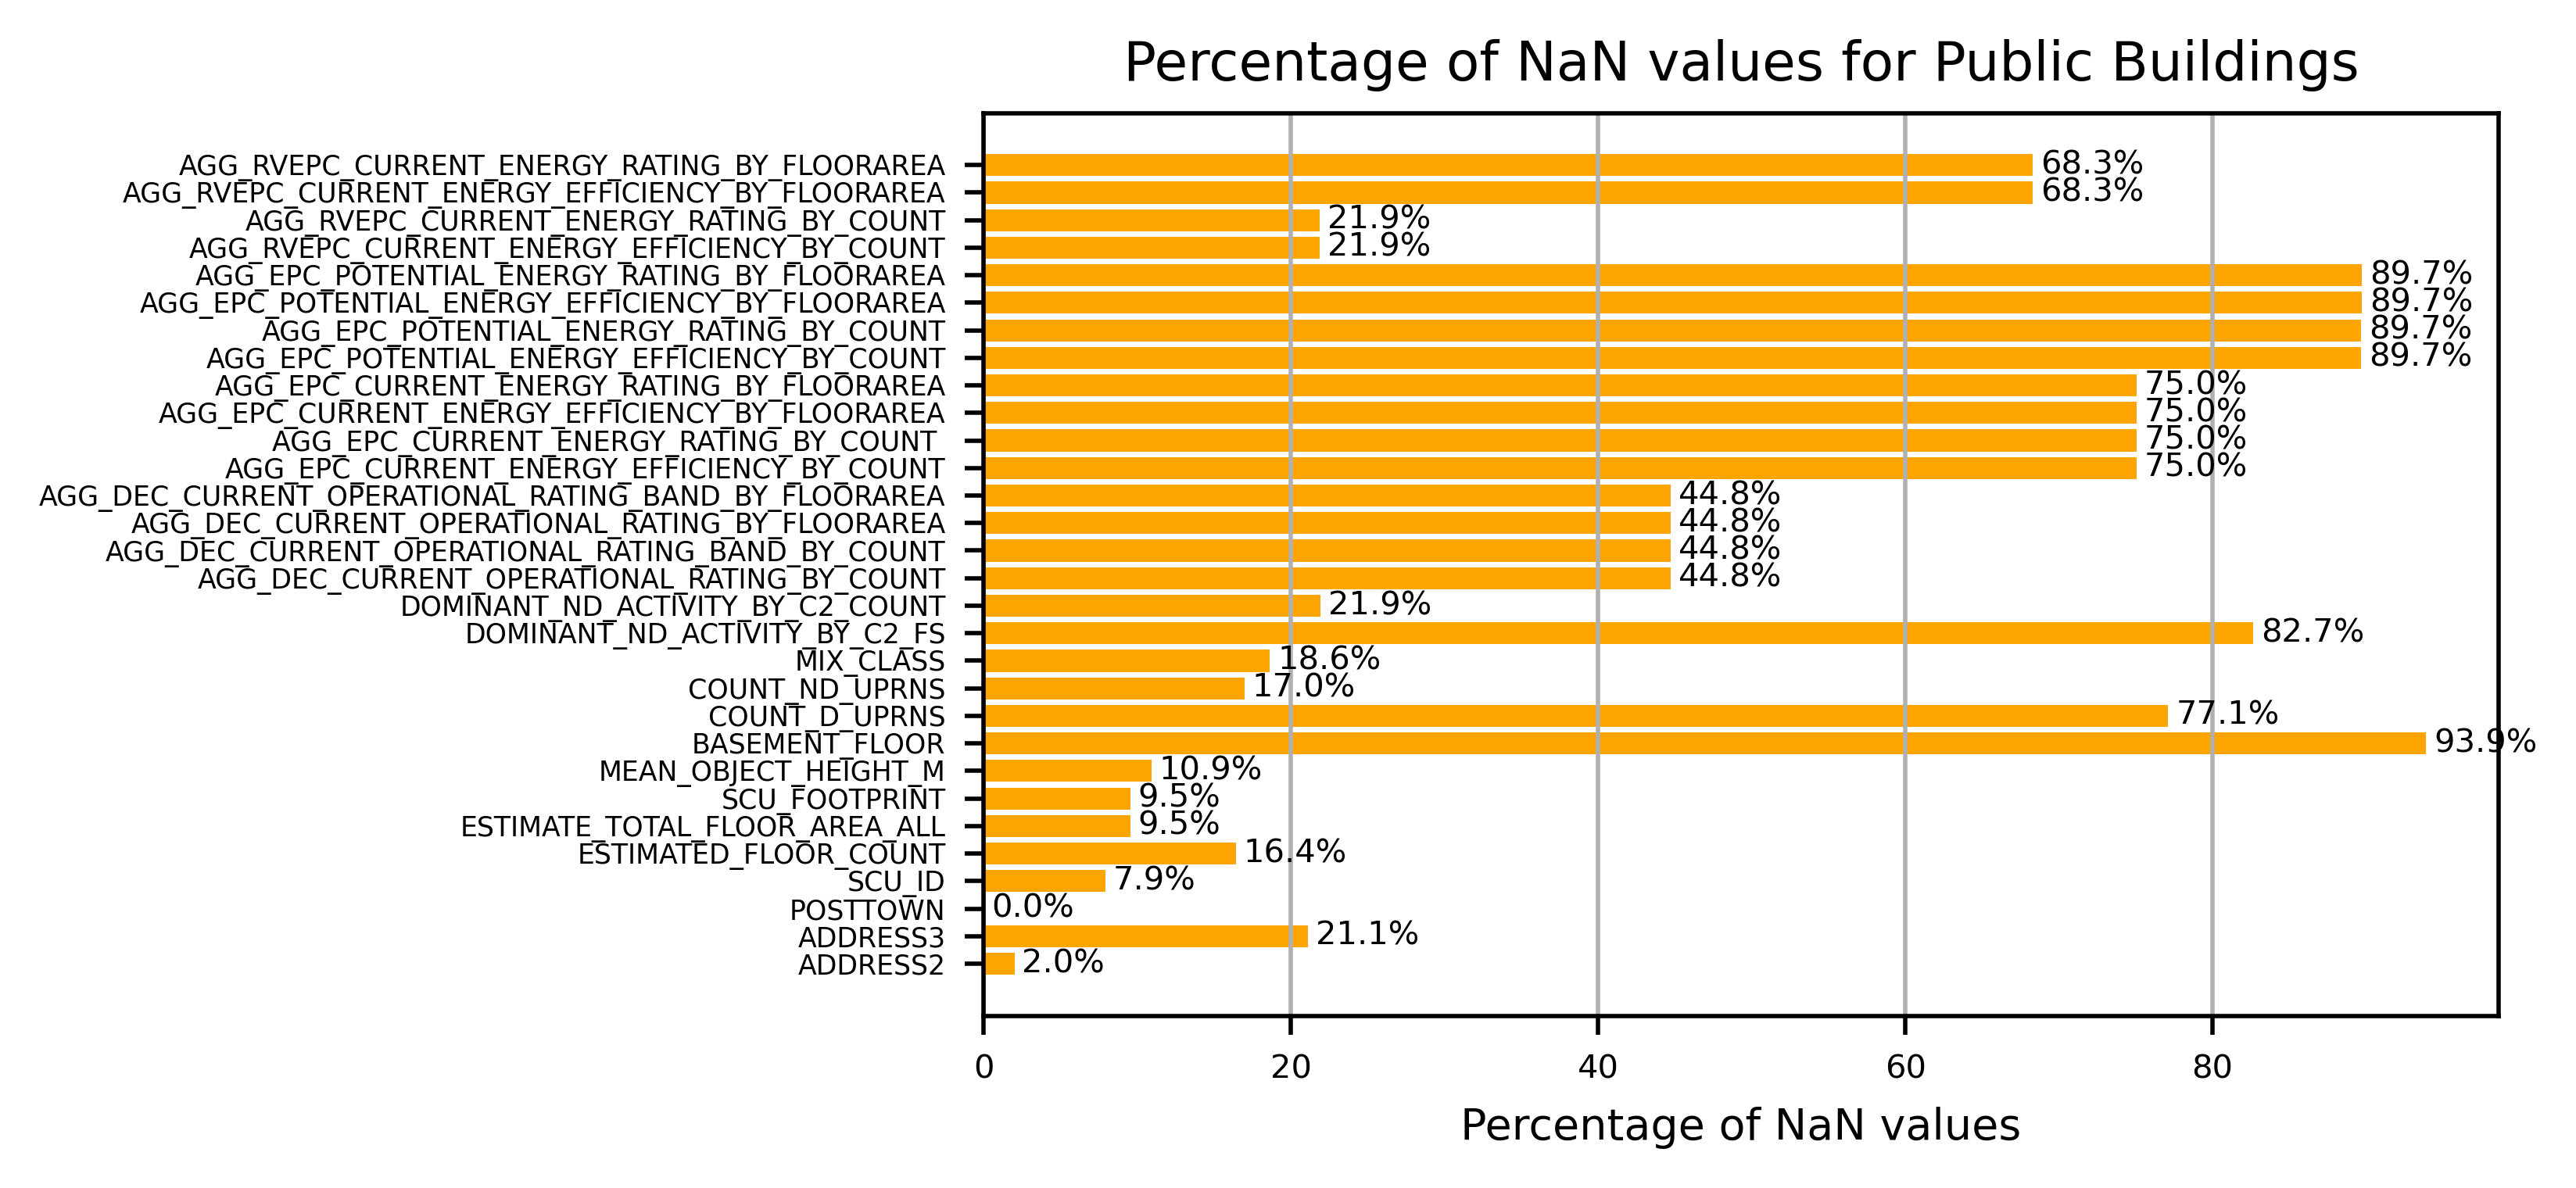

In [96]:
plot_nan(nan_pbdf, 23622, 'Percentage of NaN values for Public Buildings','orange')

In [15]:
val_pb = nan_pbdf[nan_pbdf['NaN_%'] > 40]
print(val_pb)

                                               Column  NaN_Count      NaN_%
8                                      BASEMENT_FLOOR      22185  93.916688
9                                       COUNT_D_UPRNS      18216  77.114554
12                      DOMINANT_ND_ACTIVITY_BY_C2_FS      19524  82.651765
14        AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT      10571  44.750656
15   AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT      10571  44.750656
16    AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA      10571  44.750656
17  AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLO...      10571  44.750656
18         AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT      17725  75.035983
19            AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT       17725  75.035983
20     AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA      17727  75.044450
21         AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA      17727  75.044450
22       AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT      21187  89.691813
23          

In [16]:
drop=[
'BASEMENT_FLOOR','COUNT_D_UPRNS','DOMINANT_ND_ACTIVITY_BY_C2_FS',      
        'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',     
   'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',     
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',      
  'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',     
         'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',     
            'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT',       
     'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',      
         'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',      
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',      
           'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT',     
   'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',     
       'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA',      
   'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',     
       'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA'      
     ]

merged.drop(columns=drop,axis=1,inplace=True)

In [18]:
merged.columns

Index(['LMK_KEY', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER',
       'CURRENT_OPERATIONAL_RATING', 'YR1_OPERATIONAL_RATING',
       'YR2_OPERATIONAL_RATING', 'OPERATIONAL_RATING_BAND', 'ELECTRIC_CO2',
       'HEATING_CO2', 'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE',
       'LOCAL_AUTHORITY', 'CONSTITUENCY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'MAIN_HEATING_FUEL', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDING_CATEGORY', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'NOMINATED_DATE', 'OR_ASSESSMENT_END_DATE', 'LODGEMENT_DATETIME',
       'OCC

# 2. Data Visualization and Cleaning [^](#index) <a name="2"></a> 

### 2.1 Categorical Data Analysis[^](#index) <a name="2.1"></a> 

In [19]:

def PB_categorical(df, thresholds=None, initial=None, features=None, x_angle=90, x_font=10, fig=(10, 6), colour='green'):
    """
    Plots the frequency distribution for categorical features with different range of threshold

    Parameters:
    - df: Dataframe for domestic buildings
    - thresholds: filter a list from list_thresh for specific feature as different features 
                   have different range of threshold.
    - initial: it is a default threshold for other features that have general range of threshold
    """
    if features:
        a = [features]
    else:
        a = df.select_dtypes(include=['object', 'category']).columns

    for col in a:
        counts = df[col].value_counts()

        # Checking the threshold value for the current feature
        if thresholds and col in thresholds:
            thresh = thresholds[col]
            if callable(thresh):
                z = counts[thresh(counts)]
            else:
                z = counts[counts > thresh]
        else:
            z = counts[counts > initial]

        if not z.empty:
            plt.figure(figsize=fig)
            plt.bar(z.index, z.values, color=colour, edgecolor='black')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.xticks(rotation=x_angle, fontsize=x_font)
            plt.xticks(range(0, len(z), max(1, len(z)//50)), z.index[::max(1, len(z)//50)], rotation=90, fontsize=x_font)
            plt.grid(False)
            plt.tight_layout()
            plt.show()

# Range of threshold for specific features
list_thresh = {
    'DOMINANT_ND_ACTIVITY_BY_C2_COUNT': lambda x: x > 500,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT':lambda x: x > 100,
    'ADDRESS2':lambda x: x > 50,
    'ADDRESS3':lambda x: x > 10, 'ESTIMATED_FLOOR_COUNT':lambda x: x > 100,
    'MAIN_HEATING_FUEL':lambda x: x > 1000, 
    #'SCU_ID':lambda x: x >30
}
  


In [20]:
#for discrete type of data
def median(df, feature):
    
    # Calculate the median and replace the NAN values from original dataframe
    med = df[feature].median()
    df.loc[:, feature] = df[feature].fillna(med)
    
    return df

In [21]:
merged['COUNT_ND_UPRNS'].value_counts()

COUNT_ND_UPRNS
1.0      13219
2.0       3052
3.0       1123
4.0        511
5.0        264
10.0       195
12.0       187
6.0        176
7.0        165
14.0        85
11.0        83
17.0        72
8.0         69
13.0        61
21.0        58
15.0        50
9.0         46
18.0        32
16.0        27
23.0        24
20.0        11
26.0         9
34.0         8
58.0         8
19.0         8
28.0         7
36.0         7
75.0         7
146.0        7
27.0         6
24.0         5
74.0         5
191.0        5
31.0         4
66.0         3
45.0         3
57.0         2
205.0        2
37.0         2
44.0         2
41.0         1
61.0         1
Name: count, dtype: int64

In [22]:
merged.loc[:, 'COUNT_ND_UPRNS']=np.random.randint(1.0,300,len(merged))
max_nd=max(merged['COUNT_ND_UPRNS'])
max_nd

299.0

<Axes: ylabel='COUNT_ND_UPRNS_bin'>

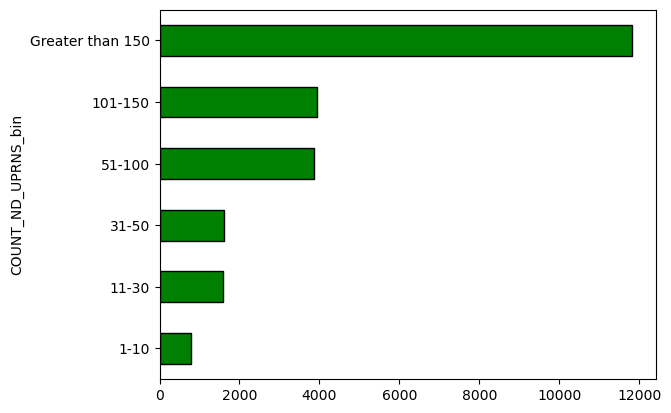

In [23]:
bins1 = [0, 10, 30, 50, 100, 150, max_nd ] 
category1 = ["1-10", "11-30", "31-50", "51-100", "101-150", "Greater than 150"]
merged.loc[:, 'COUNT_ND_UPRNS_bin']=pd.cut(merged['COUNT_ND_UPRNS'],bins=bins1,labels=category1)
merged['COUNT_ND_UPRNS_bin'].value_counts().sort_index().plot(kind='barh', color='green', edgecolor='black')

In [24]:
merged = median(merged, 'COUNT_ND_UPRNS')

In [25]:
merged['SCU_ID'].value_counts()

SCU_ID
5.210103e+13    147
5.690100e+13    141
5.390113e+13    110
5.330103e+13    109
5.510115e+13    102
               ... 
5.840119e+13      1
5.840103e+13      1
5.840103e+13      1
5.840103e+13      1
5.030102e+13      1
Name: count, Length: 3877, dtype: int64

In [26]:
merged['SCU_ID'].fillna(method='ffill', inplace=True)#USING FORWARD METHOD

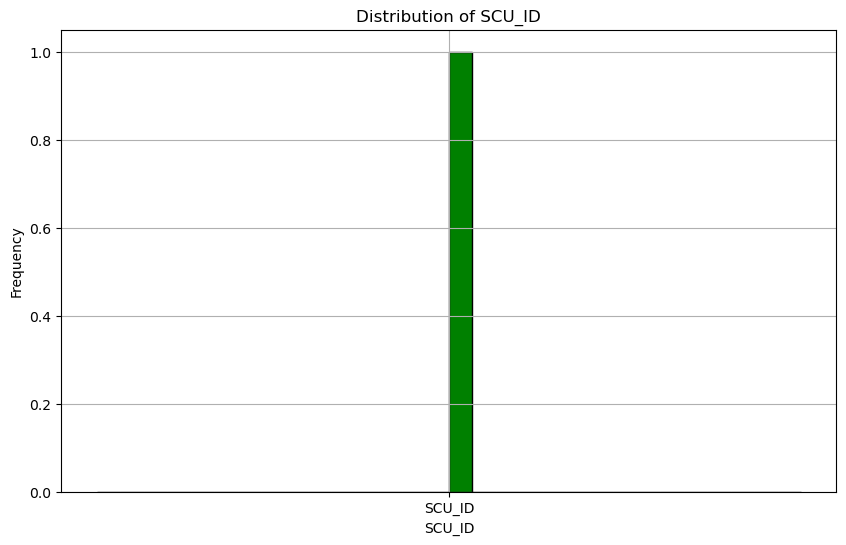

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(['SCU_ID'], bins=30, color='green',edgecolor='black')
plt.title('Distribution of SCU_ID')
plt.xlabel('SCU_ID')
plt.ylabel('Frequency')
#plt.xlim([0, 6])
plt.grid(True)
plt.show()

In [28]:
merged['AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT'].value_counts()

AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT
B    5897
C    5832
D    4243
E    1167
A     824
F     265
G     222
Name: count, dtype: int64

In [29]:
merged['AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT']= merged['AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT'].replace(np.nan, "B")

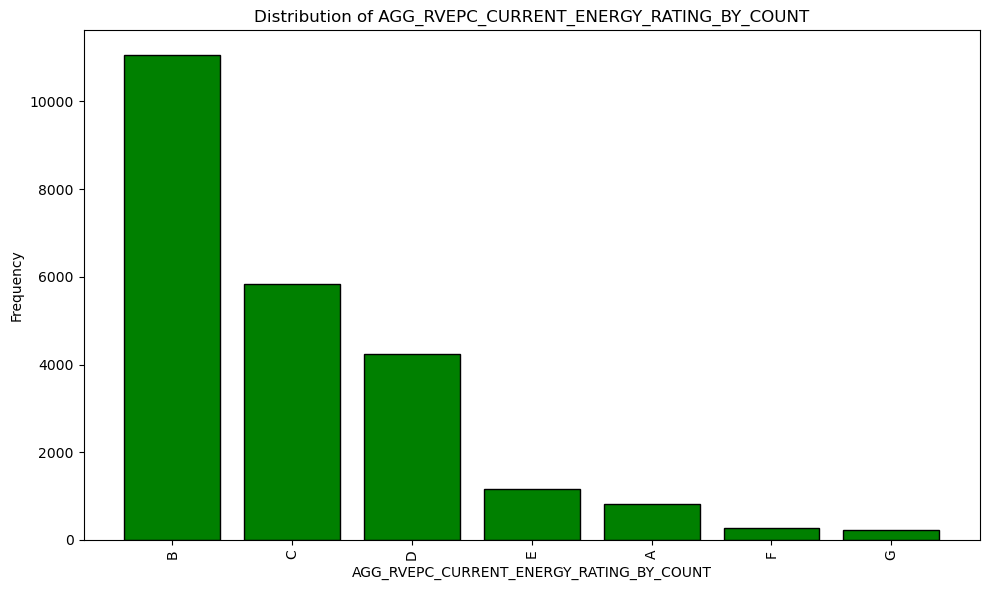

In [30]:
PB_categorical(merged, thresholds=list_thresh, features='AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT')

In [31]:
merged['POSTTOWN'].value_counts()

POSTTOWN
LONDON                  12949
London                    647
ILFORD                    461
ROMFORD                   461
UXBRIDGE                  434
                        ...  
DEPTFORD                    1
Westerham                   1
Kingston Upon Thames        1
LONDON                      1
Hendon                      1
Name: count, Length: 189, dtype: int64

In [32]:
merged = merged.dropna(subset=['POSTTOWN'])
POSTTOWN = merged['POSTTOWN'].value_counts().idxmax()

In [33]:
merged['ESTIMATED_FLOOR_COUNT'].value_counts()#.idxmax()
#merged['OA']= merged['OA'].replace(np.nan, "E00175033")

ESTIMATED_FLOOR_COUNT
1.0     10969
2.0      3423
3.0      2353
4.0      1147
5.0       773
6.0       394
7.0       251
8.0       187
9.0        72
12.0       38
10.0       33
16.0       23
11.0       22
14.0       13
0.0        12
13.0       11
42.0        6
15.0        5
31.0        2
32.0        2
18.0        1
34.0        1
Name: count, dtype: int64

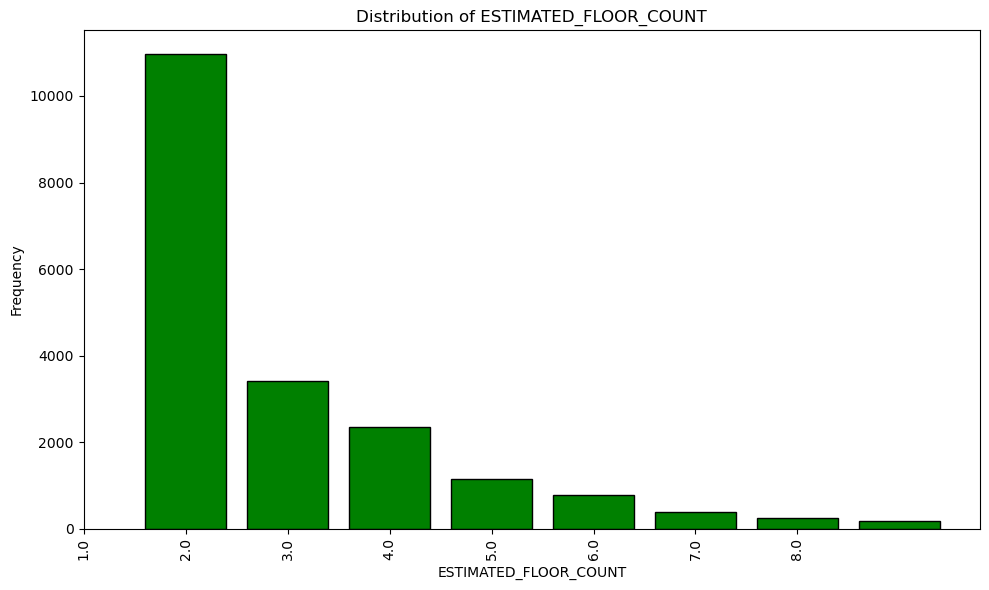

In [34]:
PB_categorical(merged, thresholds=list_thresh, features='ESTIMATED_FLOOR_COUNT')

In [35]:
merged['ESTIMATED_FLOOR_COUNT']=np.random.randint(1.0,100,len(merged))
max_EFC=max(merged['ESTIMATED_FLOOR_COUNT'])
max_EFC

/tmp/ipykernel_86962/1644962796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['ESTIMATED_FLOOR_COUNT']=np.random.randint(1.0,100,len(merged))


99

/tmp/ipykernel_86962/2757131377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['ESTIMATED_FLOOR_COUNT_bin']=pd.cut(merged['ESTIMATED_FLOOR_COUNT'],bins=bin1,labels=category1)


<Axes: ylabel='ESTIMATED_FLOOR_COUNT_bin'>

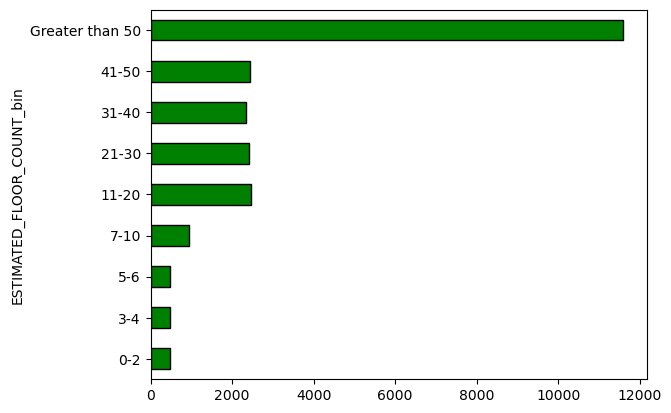

In [36]:
bin1=[0, 2, 4, 6, 10, 20, 30, 40, 50,max_EFC]
category1=['0-2', '3-4', '5-6', '7-10', '11-20', '21-30', '31-40', '41-50','Greater than 50']
merged['ESTIMATED_FLOOR_COUNT_bin']=pd.cut(merged['ESTIMATED_FLOOR_COUNT'],bins=bin1,labels=category1)
merged['ESTIMATED_FLOOR_COUNT_bin'].value_counts().sort_index().plot(kind='barh', color='green', edgecolor='black')

In [37]:
merged = median(merged, 'ESTIMATED_FLOOR_COUNT')

In [38]:
merged['DOMINANT_ND_ACTIVITY_BY_C2_COUNT'].value_counts()

DOMINANT_ND_ACTIVITY_BY_C2_COUNT
Education                            12362
Health                                1502
Office                                1378
Emergency                              785
Arts and Leisure                       699
Community                              601
Sport                                  492
Shop                                   222
Factory                                158
Hospitality                            136
Misc                                    54
Warehouse                               29
MOD                                      9
Agriculture, Countryside, Animals        5
Transport                                4
Name: count, dtype: int64

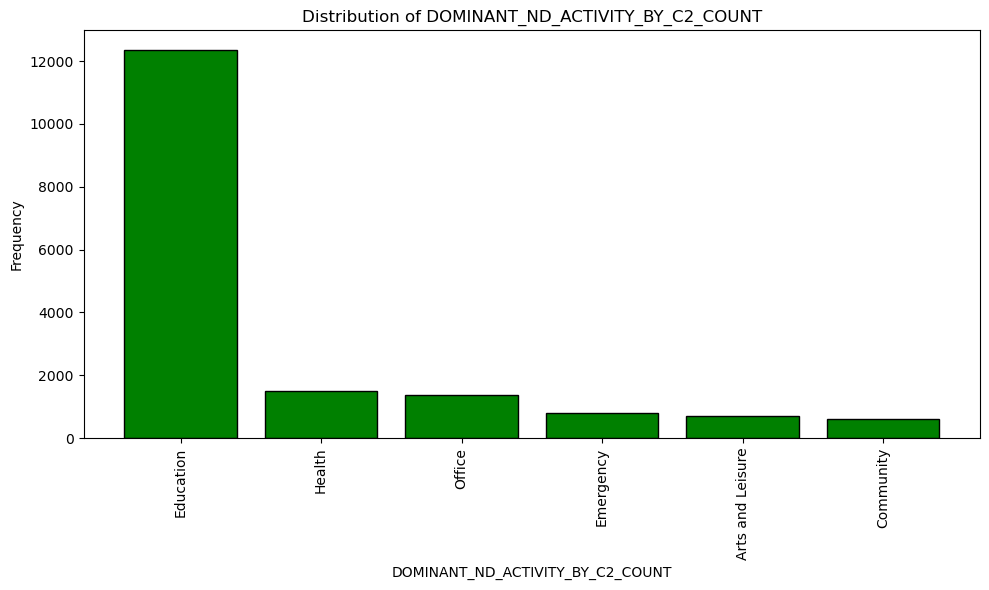

In [39]:

PB_categorical(merged, thresholds=list_thresh, features='DOMINANT_ND_ACTIVITY_BY_C2_COUNT')

In [40]:

merged.loc[:, 'DOMINANT_ND_ACTIVITY_BY_C2_COUNT'] =merged['DOMINANT_ND_ACTIVITY_BY_C2_COUNT'].replace(np.nan, "Education")


In [41]:
merged['MIX_CLASS'].dtype

dtype('float64')

In [42]:
merged['MIX_CLASS'].value_counts()#.idxmax()

MIX_CLASS
1.0     12122
7.0      2424
3.0      1483
4.0      1410
2.0       670
8.0       349
10.0      333
5.0       201
6.0       126
9.0       101
Name: count, dtype: int64

In [43]:
merged = median(merged, 'MIX_CLASS')

In [46]:
PB_categorical(merged, thresholds=list_thresh,features='MIX_CLASS')

### 2.2 Continous Data Analysis [^](#index) <a name="2.2"></a> 

In [49]:
def plot_continous(df, feature, x_rotation=90, x_fontsize=10, edge_color='black', 
                   figsize=(10, 6),colour='green', x_limits=None,bins=30):
    """
    Plots the distribution for continous data.
    
    Parameters:
    - data::dom_df for domestic buildings
      
    - x_limits: 
        A variable to set limit for x-axis to assist visualizing purpose
    """
    
    counts = (df[feature].value_counts())
    
    plt.figure(figsize=figsize)
    plt.hist(df[feature], bins=bins, color=colour, edgecolor=edge_color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    if x_limits is not None:
        plt.xlim(x_limits)
        
    plt.xticks(rotation=x_rotation, fontsize=x_fontsize)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    

In [50]:
def lbsmPB_mean(df, col):
   
    df.loc[:, col] = df[col].astype(float)
    
    for j in range(len(df)):
        if pd.isna(df.iloc[j][col]):
            
            # Get the previous and the next value at the NaN cell
            previous = df.iloc[j-1][col] if j > 0 else np.nan
            next_val = df.iloc[j+1][col] if j < len(df) - 1 else np.nan
            
            # Calculate the mean of the previous and next values
            if pd.notna(previous) and pd.notna(next_val):#identify false NAN values
                mean = (previous + next_val) / 2
            elif pd.notna(previous):
                mean = previous
            elif pd.notna(next_val):
                mean = next_val
            else:
                mean = np.nan
            
            # Replace the NaN cell with the mean value
            df.iloc[j, df.columns.get_loc(col)] = mean
    
    return df

In [51]:

merged['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].value_counts()#.idxmax()

AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT
89.0     822
87.0     680
69.0     655
79.0     648
82.0     630
        ... 
5.0        1
28.0       1
7.0        1
116.0      1
22.0       1
Name: count, Length: 114, dtype: int64

In [52]:
merged['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].dtype

dtype('float64')

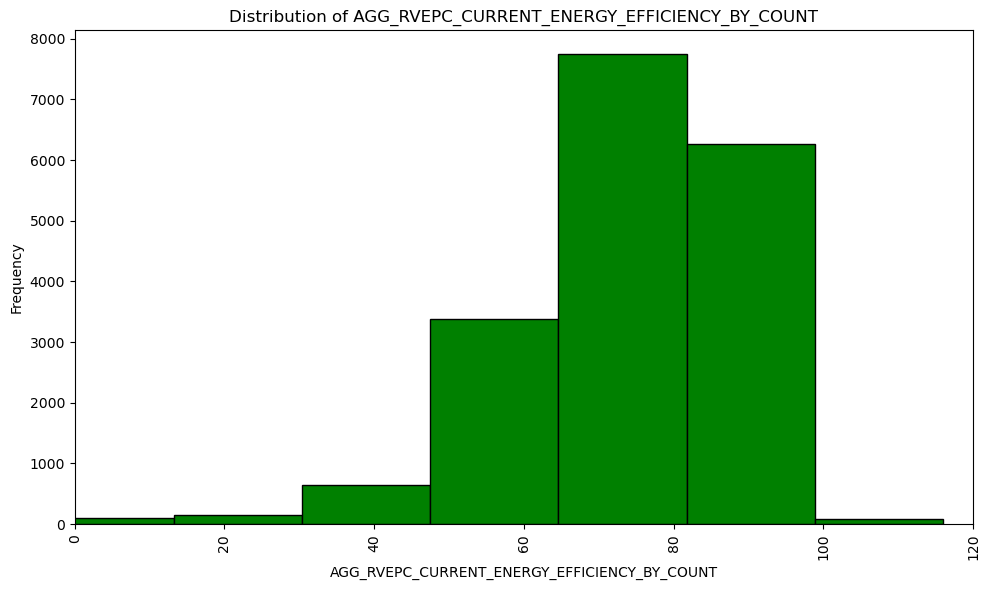

In [53]:
plot_continous(merged, 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', x_rotation=90, x_fontsize=10, x_limits=(0,120))

In [54]:
merged= lbsmPB_mean(merged, 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT')

In [55]:
merged['DOMINANT_ND_ACTIVITY_BY_C2_COUNT']

0          Community
1          Community
2          Community
3          Community
4          Community
            ...     
23617    Hospitality
23618      Community
23619      Education
23620      Education
23621         Office
Name: DOMINANT_ND_ACTIVITY_BY_C2_COUNT, Length: 23619, dtype: object

In [56]:
merged['MEAN_OBJECT_HEIGHT_M'].value_counts().idxmax

<bound method Series.idxmax of MEAN_OBJECT_HEIGHT_M
14.94    147
12.43    141
5.15     120
12.30    107
4.11     105
        ... 
24.71      1
9.62       1
2.21       1
23.29      1
28.07      1
Name: count, Length: 1483, dtype: int64>

In [57]:
merged= lbsmPB_mean(merged, 'MEAN_OBJECT_HEIGHT_M')

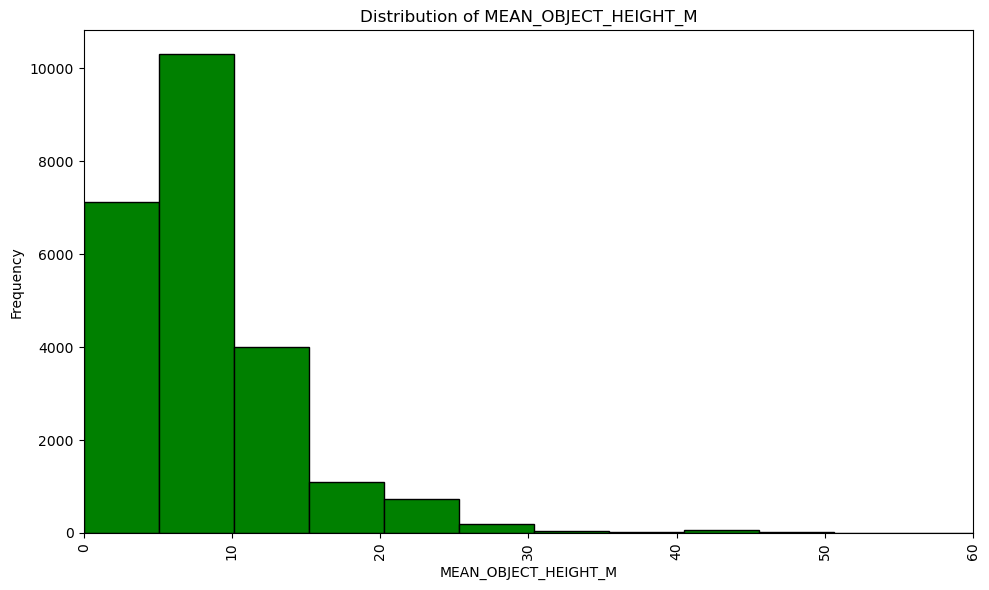

In [58]:
plot_continous(merged, 'MEAN_OBJECT_HEIGHT_M', x_rotation=90, x_fontsize=10, x_limits=(0,60))

In [59]:
merged['SCU_FOOTPRINT'].value_counts().idxmax

<bound method Series.idxmax of SCU_FOOTPRINT
617.85      147
26156.80    141
37737.13    110
2809.39     109
1071.77     102
           ... 
1212.84       1
804.09        1
605.87        1
125.51        1
1874.23       1
Name: count, Length: 3771, dtype: int64>

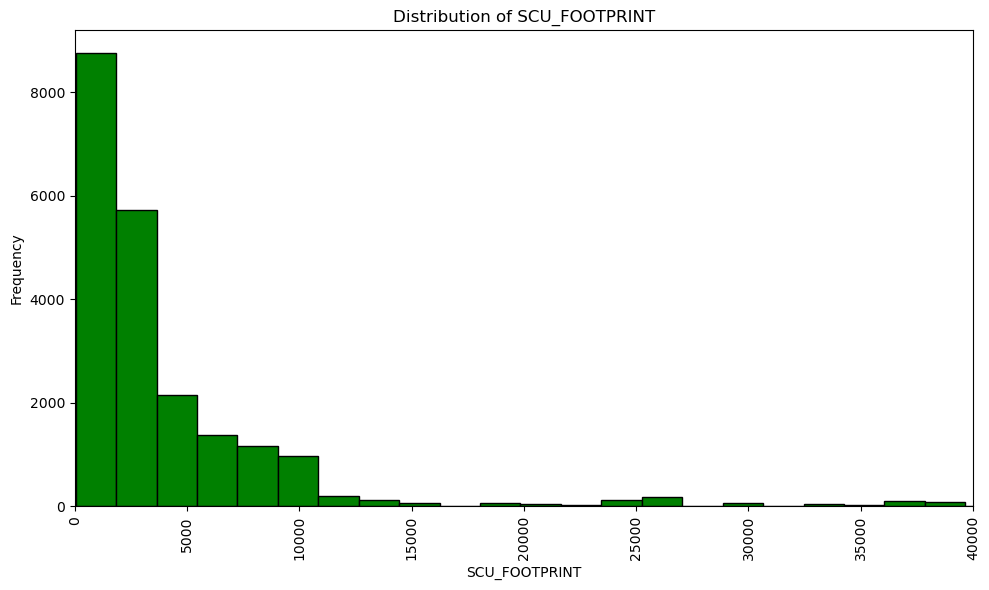

In [60]:
plot_continous(merged, 'SCU_FOOTPRINT', x_rotation=90, x_fontsize=10, x_limits=(0, 40000))

In [61]:
merged= lbsmPB_mean(merged, 'SCU_FOOTPRINT')

In [62]:
merged['ESTIMATE_TOTAL_FLOOR_AREA_ALL'].dtype

dtype('float64')

In [63]:
merged= lbsmPB_mean(merged, 'ESTIMATE_TOTAL_FLOOR_AREA_ALL')

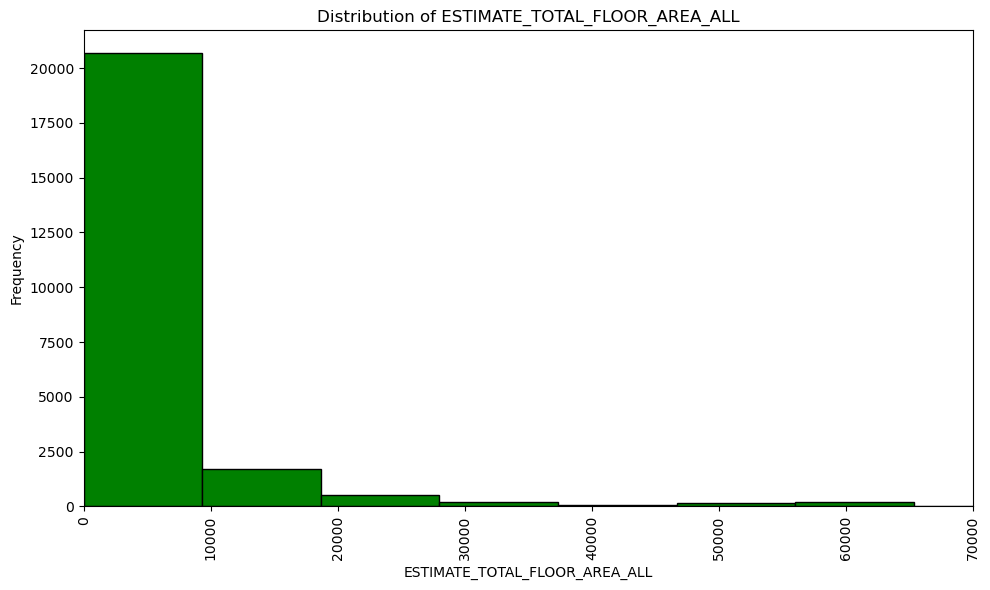

In [64]:
plot_continous(merged, 'ESTIMATE_TOTAL_FLOOR_AREA_ALL', x_rotation=90, x_fontsize=10, x_limits=(0, 70000))

In [71]:
merged= lbsmPB_mean(merged, 'YR1_ELECTRICITY_CO2')

In [68]:
merged['YR1_ELECTRICITY_CO2'].value_counts().idxmax

<bound method Series.idxmax of YR1_ELECTRICITY_CO2
38.0      213
32.0      208
37.0      205
39.0      203
33.0      202
         ... 
2381.0      1
1826.0      1
1943.0      1
1915.0      1
3037.0      1
Name: count, Length: 1589, dtype: int64>

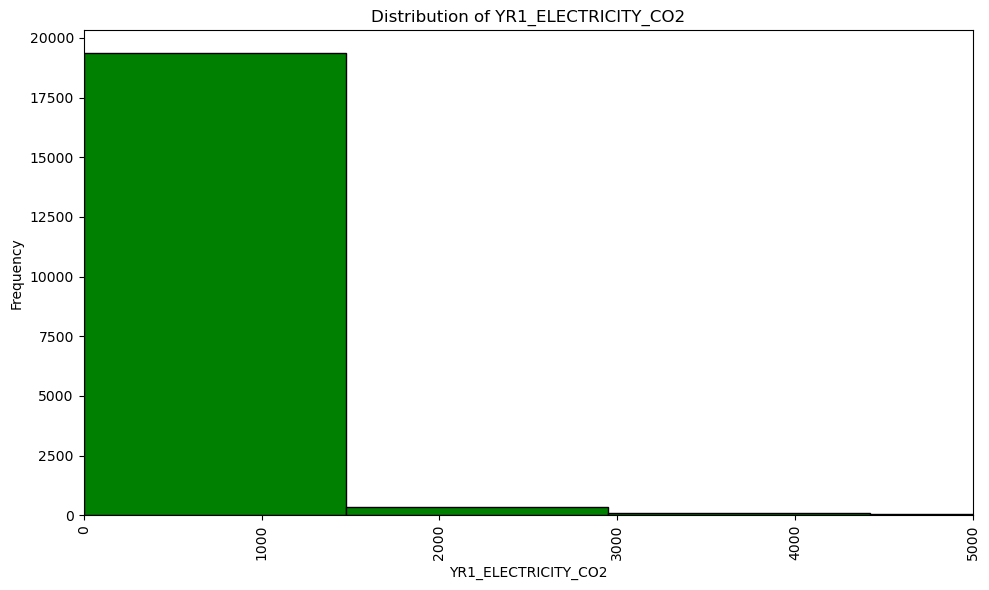

In [70]:
plot_continous(merged, 'YR1_ELECTRICITY_CO2', x_rotation=90, x_fontsize=10, x_limits=(0,5000))

# 3. Convert Categorical to Numerical data [^](#index) <a name="3"></a> 

<div style="text-indent: 2em;">
&nbsp;&nbsp;&nbsp;&nbsp;Finally,get familiar with the data type of the features available and save the data as the next step is to convert the categorical data into numerical value.<div>

In [65]:
merged

LMK_KEY  POSTCODE  \
0                       93750320042019030807472783410070   W12 7PT   
1                       93750320042020031613373084410070   W12 7PT   
2                       93750320002017032711260082410270   W12 7PT   
3                       93750350062018031211164904220831   W12 7PT   
4      2909a74c40c34a1861521f2a2f1b259682bd49ecfec4e8...   W12 7PT   
...                                                  ...       ...   
23617  d67a2b45db159469c5cb58eeac510fb57cb0c7bf713f66...    E1 7BS   
23618  e8e8fc53ca150f627df1c06f5995555b3be47823bfacbe...  EC4M 7EH   
23619  f40f825570335afe5507632b7b9100de6d749b91534c45...  EC3A 5DE   
23620  c3a18b3b9288cc2196ea5107af9b797c32f2c85ba56d53...  EC3A 5DE   
23621  354aee9f97903fc50182d45864059cae331ad14dabffcb...  EC3M 3BY   

       BUILDING_REFERENCE_NUMBER  CURRENT_OPERATIONAL_RATING  \
0                   302052480001                       106.0   
1                   302052480001                        91.0   
2                   302052480001                        95.0   
3                   302052480001                       112.0   
4                    10000869430                        88.0   
...                          ...                         ...   
23617                10003826584                       124.0   
23618                10004947247                        83.0   
23619                10003826866                        74.0   
23620                10003826866                        82.0   
23621                10004530415                       162.0   

       YR1_OPERATIONAL_RATING  YR2_OPERATIONAL_RATING OPERATIONAL_RATING_BAND  \
0                       112.0                    95.0                       E   
1                       106.0                   112.0                       D   
2                        95.0                    95.0                       D   
3                        95.0                   104.5                       E   
4                        91.0                   106.0                       D   
...                       ...                     ...                     ...   
23617                   161.0                   113.0                       E   
23618                   100.5                    71.5                       D   
23619                    97.0                    85.0                       C   
23620                    74.0                    97.0                       D   
23621                   190.0                   170.5                       G   

       ELECTRIC_CO2  HEATING_CO2  RENEWABLES_CO2  ... COUNT_ND_UPRNS  \
0              69.0        128.0             0.0  ...          211.0   
1              69.0         99.0             0.0  ...          111.0   
2              86.0         97.0             0.0  ...          201.0   
3              89.0        118.0             0.0  ...          113.0   
4              61.0         99.0             0.0  ...          109.0   
...             ...          ...             ...  ...            ...   
23617          37.0          0.0             0.0  ...          148.0   
23618        1521.0        462.0             0.0  ...          268.0   
23619          81.0         54.0             0.0  ...           13.0   
23620          92.0         60.0             0.0  ...           25.0   
23621         240.0         29.0             0.0  ...          276.0   

      MIX_CLASS DOMINANT_ND_ACTIVITY_BY_C2_COUNT DEC_COUNT  \
0           3.0                        Community         2   
1           3.0                        Community         2   
2           3.0                        Community         2   
3           3.0                        Community         2   
4           3.0                        Community         2   
...         ...                              ...       ...   
23617       3.0                      Hospitality         0   
23618       7.0                        Community         0   
23619       1.0                        Educ

In [72]:
NAN = merged.isnull().sum()
NAN1 = NAN[NAN > 0]
NAN1

MAIN_BENCHMARK      1
OCCUPANCY_LEVEL    33
dtype: int64

In [73]:
merged.dropna(subset=['OCCUPANCY_LEVEL', 'MAIN_BENCHMARK'], inplace=True)


/tmp/ipykernel_86962/101037711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.dropna(subset=['OCCUPANCY_LEVEL', 'MAIN_BENCHMARK'], inplace=True)


In [76]:
merged.columns

Index(['LMK_KEY', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER',
       'CURRENT_OPERATIONAL_RATING', 'YR1_OPERATIONAL_RATING',
       'YR2_OPERATIONAL_RATING', 'OPERATIONAL_RATING_BAND', 'ELECTRIC_CO2',
       'HEATING_CO2', 'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE',
       'LOCAL_AUTHORITY', 'CONSTITUENCY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'MAIN_HEATING_FUEL', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDING_CATEGORY', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'NOMINATED_DATE', 'OR_ASSESSMENT_END_DATE', 'LODGEMENT_DATETIME',
       'OCC

In [75]:
merged.isnull().sum()

LMK_KEY                                         0
POSTCODE                                        0
BUILDING_REFERENCE_NUMBER                       0
CURRENT_OPERATIONAL_RATING                      0
YR1_OPERATIONAL_RATING                          0
                                               ..
EPC_RATING_COUNT_NONDOM                         0
AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT    0
AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT        0
COUNT_ND_UPRNS_bin                              0
ESTIMATED_FLOOR_COUNT_bin                       0
Length: 72, dtype: int64

Below are the important features that useful to be kept in categorical for further analysis.

In [78]:
category=['ADMINISTRATIVE_AREA', 'UPRN', 'INSPECTION_DATE', 'LATITUDE', 'LONGITUDE','ELECTRIC_CO2',
         'HEATING_CO2','MAIN_HEATING_FUEL']
pb_category=merged[category]
pb_category

ADMINISTRATIVE_AREA          UPRN INSPECTION_DATE   LATITUDE  \
0      HAMMERSMITH AND FULHAM  3.401835e+07      2019-03-07  51.512597   
1      HAMMERSMITH AND FULHAM  3.401835e+07      2020-03-04  51.512597   
2      HAMMERSMITH AND FULHAM  3.401835e+07      2017-03-22  51.512597   
3      HAMMERSMITH AND FULHAM  3.401835e+07      2018-02-28  51.512597   
4      HAMMERSMITH AND FULHAM  3.401835e+07      2021-03-04  51.512597   
...                       ...           ...             ...        ...   
23617          CITY OF LONDON  9.550635e+07      2023-01-17  51.515484   
23618          CITY OF LONDON  1.000229e+11      2023-08-03  51.515493   
23619          CITY OF LONDON  2.000001e+11      2023-01-23  51.513664   
23620          CITY OF LONDON  2.000001e+11      2023-11-17  51.513664   
23621          CITY OF LONDON  1.009188e+10      2023-04-04  51.511399   

       LONGITUDE  ELECTRIC_CO2  HEATING_CO2          MAIN_HEATING_FUEL  
0      -0.229347          69.0        128.0                Natural Gas  
1      -0.229347          69.0         99.0                Natural Gas  
2      -0.229347          86.0         97.0                Natural Gas  
3      -0.229347          89.0        118.0                Natural Gas  
4      -0.229347          61.0         99.0                Natural Gas  
...          ...           ...          ...                        ...  
23617  -0.077167          37.0          0.0  Grid Supplied Electricity  
23618  -0.101971        1521.0        462.0                Natural Gas  
23619  -0.077460          81.0         54.0                Natural Gas  
23620  -0.077460          92.0         60.0                Natural Gas  
23621  -0.083503         240.0         29.0                Natural Gas  

[23586 rows x 8 columns]

In [79]:
pb_category.to_csv('PB_1723_AA_UPRN_LAT_LONG_Mfuel_co2 emiss.csv',index=False)

# 3. Convert categorical to numerical [^](#index) <a name="3"></a> 

In [60]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23586 entries, 0 to 23621
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   LMK_KEY                                       23586 non-null  object        
 1   POSTCODE                                      23586 non-null  object        
 2   BUILDING_REFERENCE_NUMBER                     23586 non-null  int64         
 3   CURRENT_OPERATIONAL_RATING                    23586 non-null  float64       
 4   YR1_OPERATIONAL_RATING                        23586 non-null  float64       
 5   YR2_OPERATIONAL_RATING                        23586 non-null  float64       
 6   OPERATIONAL_RATING_BAND                       23586 non-null  object        
 7   ELECTRIC_CO2                                  23586 non-null  float64       
 8   HEATING_CO2                                   23586 non-null  float64  

In [80]:
merged.loc[:,'MIX_CLASS'] = merged['MIX_CLASS'].astype(str)
merged.loc[:,'COUNT_ND_UPRNS']=merged['COUNT_ND_UPRNS'].astype(str)
merged.loc[:,'DEC_COUNT']=merged['DEC_COUNT'].astype(str)
merged.loc[:,'EPC_RATING_COUNT_DOM']=merged['EPC_RATING_COUNT_DOM'].astype(str)
merged.loc[:,'EPC_RATING_COUNT_NONDOM']=merged['EPC_RATING_COUNT_NONDOM'].astype(str)
merged.loc[:,'COUNT_ND_UPRNS_bin']=merged['COUNT_ND_UPRNS_bin'].astype(str)
merged.loc[:,'ESTIMATED_FLOOR_COUNT_bin']=merged['ESTIMATED_FLOOR_COUNT_bin'].astype(str)

In [81]:
from sklearn.preprocessing import LabelEncoder


col = [
    
    'LMK_KEY','ADDRESS2','ADDRESS3','POSTCODE','BUILDING_REFERENCE_NUMBER',                      
    'OPERATIONAL_RATING_BAND','PROPERTY_TYPE','LOCAL_AUTHORITY','CONSTITUENCY',                                 
     'COUNTY', 'MAIN_BENCHMARK', 'MAIN_HEATING_FUEL','AIRCON_PRESENT',
    'BUILDING_ENVIRONMENT','BUILDING_CATEGORY','ADDRESS','LOCAL_AUTHORITY_LABEL',                         
    'CONSTITUENCY_LABEL','POSTTOWN','NOMINATED_DATE','OR_ASSESSMENT_END_DATE',                                      
      'LODGEMENT_DATETIME','UPRN_SOURCE','OCCUPANCY_LEVEL'            
                            
      
      ]


pb_le = LabelEncoder()

# Loop through specified columns and apply LabelEncoder
for column in col:
    if column in merged.columns and (merged[column].dtype == 'object' or merged[column].dtype == 'int'):
        if merged[column].dtype == 'object':
            merged[column] = merged[column].str.lower().str.strip()  
        merged[column] = pb_le.fit_transform(merged[column])
        
        # Create a list to map original string values to numerical values
        pb_map = dict(zip(pb_le.classes_, pb_le.transform(pb_le.classes_)))
        print(f"Mapping for {column}: {pb_map}")

Mapping for LMK_KEY: {'0000d280a069894a9dcc00c2d2abc9d52249a2f673ec8e294c4411e9b05575f2': 0, '0008670866f1bc3fc305010ee4a8eb454621f18c04d6cff43b8cfe77a0102fec': 1, '0008f85e840583aaa0605222c2675668298818612715918ee52102d30e11d1b9': 2, '000b5d79b7cdd1d0d382884ffddc7033d5b66986e76c1eb9d28961dece5ca30b': 3, '000b79a12cba8f64c65f0ce04b7cde2fb9d7630577d1387d8e83bacb90b6ecd2': 4, '00105bcd4adcce5b93254c1e519d45fd09c4cd1d4edf8f9f6ec2e122c0952775': 5, '0010c2395e37b83ec85bcb4c31039f5181defdd28ad5c04cfdfaa728cbd90388': 6, '0014475976abfe3de7bff177d2dbb042dc9c2f50fef74fc3b9e9dc125e02cd51': 7, '001927ec9c2b6a682e42003d69d220afe9c54d40ffe335f832818deb23892bd1': 8, '001fea80e32dc88ab145fa795f64c4367561b40fe41507e1f87a3ea77f158ddd': 9, '00278702429018a80eb19b7db8bdb8ba6983c6e80ee587e5004a1f44a2443110': 10, '00341230ed5c423249dfb0b7c8abbb8e4feb9a06abd71f307e079281cbbdf713': 11, '0039e238bf1bf2907936fa1755e47d417de0390dc36a8ea191afd22261b86cf1': 12, '003e27024031bd40f2f2cc01cf4ca5237b60491a2365118f1cd

/tmp/ipykernel_86962/609519307.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[column] = merged[column].str.lower().str.strip()
/tmp/ipykernel_86962/609519307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[column] = pb_le.fit_transform(merged[column])
/tmp/ipykernel_86962/609519307.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [82]:
col = [
    
   'OS_TOPO_TOID','OA',                                                  
  'LSOA', 'DEC_COUNT',                                                 
  'MSOA', 'EPC_RATING_COUNT_DOM',                                                
   'OAC',  'EPC_RATING_COUNT_NONDOM',                                                
   'WARD_CODE',                                            
   'WARD','ADMINISTRATIVE_AREA','ESTIMATED_FLOOR_COUNT','MIX_CLASS','DOMINANT_ND_ACTIVITY_BY_C2_COUNT',                         
   'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT'

      ]


pb_le = LabelEncoder()

# Loop through specified columns and apply LabelEncoder
for column in col:
    if column in merged.columns and (merged[column].dtype == 'object' or merged[column].dtype == 'int'):
        if merged[column].dtype == 'object':
            merged[column] = merged[column].str.lower().str.strip()  
        merged[column] = pb_le.fit_transform(merged[column])
        
        # Create a list to map original string values to numerical values
        pb_map = dict(zip(pb_le.classes_, pb_le.transform(pb_le.classes_)))
        print(f"Mapping for {column}: {pb_map}")

Mapping for OS_TOPO_TOID: {'osgb1000000002446': 0, 'osgb1000000004421': 1, 'osgb1000000004802': 2, 'osgb1000000007195': 3, 'osgb1000000007559': 4, 'osgb1000000009206': 5, 'osgb1000000009646': 6, 'osgb1000000010609': 7, 'osgb1000000010745': 8, 'osgb1000000027094': 9, 'osgb1000000027323': 10, 'osgb1000000028520': 11, 'osgb1000000028873': 12, 'osgb1000000029297': 13, 'osgb1000000031812': 14, 'osgb1000000032389': 15, 'osgb1000000036893': 16, 'osgb1000000039718': 17, 'osgb1000000041656': 18, 'osgb1000000044689': 19, 'osgb1000000044693': 20, 'osgb1000000045950': 21, 'osgb1000000046896': 22, 'osgb1000000049371': 23, 'osgb1000000049753': 24, 'osgb1000000052441': 25, 'osgb1000000052970': 26, 'osgb1000000055894': 27, 'osgb1000000055923': 28, 'osgb1000000058699': 29, 'osgb1000000058924': 30, 'osgb1000000061312': 31, 'osgb1000000065557': 32, 'osgb1000000065702': 33, 'osgb1000000066369': 34, 'osgb1000000066405': 35, 'osgb1000000067096': 36, 'osgb1000000068071': 37, 'osgb1000000069264': 38, 'osgb100

/tmp/ipykernel_86962/1316757339.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[column] = merged[column].str.lower().str.strip()
/tmp/ipykernel_86962/1316757339.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[column] = pb_le.fit_transform(merged[column])
/tmp/ipykernel_86962/1316757339.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [89]:

ordinal_mapping = {
    '0-2': 1,
    '3-4': 2,
    '5-6': 3,
    '7-10': 4,
    '11-15': 5,
    '16-20': 6,
    '21-30': 7,
    '31-40': 8,
    '41-50': 9,
    'Greater than 50': 10
}

# Applying the mapping to the column
merged['ESTIMATED_FLOOR_COUNT_binnumeric'] = merged['ESTIMATED_FLOOR_COUNT_bin'].map(ordinal_mapping)
merged['ESTIMATED_FLOOR_COUNT_binnumeric'].head()


/tmp/ipykernel_86962/3717408442.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['ESTIMATED_FLOOR_COUNT_binnumeric'] = merged['ESTIMATED_FLOOR_COUNT_bin'].map(ordinal_mapping)


0     9.0
1     7.0
2    10.0
3    10.0
4    10.0
Name: ESTIMATED_FLOOR_COUNT_binnumeric, dtype: float64

In [91]:

ordinal_mapping = {
    '1-10': 1,
    '11-30': 2,
    '31-50': 3,
    '51-100': 4,
    '101-150': 5,
    'Greater than 150': 6,
  
}



# Applying the mapping to the column
merged['COUNT_ND_binnumeric'] = merged['COUNT_ND_UPRNS_bin'].map(ordinal_mapping)
merged['COUNT_ND_binnumeric'].head()


/tmp/ipykernel_86962/1816438753.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['COUNT_ND_binnumeric'] = merged['COUNT_ND_UPRNS_bin'].map(ordinal_mapping)


0    6
1    5
2    6
3    5
4    5
Name: COUNT_ND_binnumeric, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [84]:
# Convert the date column to datetime (assuming the date column is named 'date')
merged['INSPECTION_DATE'] = pd.to_datetime(merged['INSPECTION_DATE'], errors='coerce')

# Check the minimum and maximum dates
min_date = merged['INSPECTION_DATE'].min()
max_date = merged['INSPECTION_DATE'].max()

min_date, max_date

/tmp/ipykernel_86962/2585368928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['INSPECTION_DATE'] = pd.to_datetime(merged['INSPECTION_DATE'], errors='coerce')


(Timestamp('2013-08-11 00:00:00'), Timestamp('2023-12-29 00:00:00'))

In [90]:
merged

LMK_KEY  POSTCODE  BUILDING_REFERENCE_NUMBER  \
0        18071      3730                       4716   
1        18072      3730                       4716   
2        18070      3730                       4716   
3        18073      3730                       4716   
4         7193      3730                         69   
...        ...       ...                        ...   
23617    21689       442                       3048   
23618    22497       981                       3505   
23619    22994       970                       3081   
23620    20851       970                       3081   
23621     8452       972                       3280   

       CURRENT_OPERATIONAL_RATING  YR1_OPERATIONAL_RATING  \
0                           106.0                   112.0   
1                            91.0                   106.0   
2                            95.0                    95.0   
3                           112.0                    95.0   
4                            88.0                    91.0   
...                           ...                     ...   
23617                       124.0                   161.0   
23618                        83.0                   100.5   
23619                        74.0                    97.0   
23620                        82.0                    74.0   
23621                       162.0                   190.0   

       YR2_OPERATIONAL_RATING  OPERATIONAL_RATING_BAND  ELECTRIC_CO2  \
0                        95.0                        5          69.0   
1                       112.0                        4          69.0   
2                        95.0                        4          86.0   
3                       104.5                        5          89.0   
4                       106.0                        4          61.0   
...                       ...                      ...           ...   
23617                   113.0                        5          37.0   
23618                    71.5                        4        1521.0   
23619                    85.0                        3          81.0   
23620                    97.0                        4          92.0   
23621                   170.5                        7         240.0   

       HEATING_CO2  RENEWABLES_CO2  ...  MIX_CLASS  \
0            128.0             0.0  ...          3   
1             99.0             0.0  ...          3   
2             97.0             0.0  ...          3   
3            118.0             0.0  ...          3   
4             99.0             0.0  ...          3   
...            ...             ...  ...        ...   
23617          0.0             0.0  ...          3   
23618        462.0             0.0  ...          7   
23619         54.0             0.0  ...          0   
23620         60.0             0.0  ...          0   
23621         29.0             0.0  ...          3   

      DOMINANT_ND_ACTIVITY_BY_C2_COUNT  DEC_COUNT  EPC_RATING_COUNT_DOM  \
0                                    2          6                     0   
1                                    2          6                     0   
2                                    2          6                     0   
3                                    2          6                     0   
4                                    2          6                     0   
...                                ...        ...                   ...   
23617                                7          0                     0   
23618                                2          0                     0   
23619                                3          0                     0   
23620                                3          0                     0   
23621                               10          0                     0   

      EPC_RATING_COUNT_NONDOM  AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT  \
0                           0                                          64.0   
1                           0           

In [92]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23586 entries, 0 to 23621
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   LMK_KEY                                       23586 non-null  int64         
 1   POSTCODE                                      23586 non-null  int64         
 2   BUILDING_REFERENCE_NUMBER                     23586 non-null  int64         
 3   CURRENT_OPERATIONAL_RATING                    23586 non-null  float64       
 4   YR1_OPERATIONAL_RATING                        23586 non-null  float64       
 5   YR2_OPERATIONAL_RATING                        23586 non-null  float64       
 6   OPERATIONAL_RATING_BAND                       23586 non-null  int64         
 7   ELECTRIC_CO2                                  23586 non-null  float64       
 8   HEATING_CO2                                   23586 non-null  float64  

In [93]:
merged.to_csv('2.2_PB_1723.csv',index=False)

# 4. Conclusion [^](#index) <a name="4"></a> 

<div style="text-indent: 2em;text-align: justify;">
&nbsp;&nbsp;&nbsp;&nbsp;In conclusion, only two discrete features, which are COUNT_ND_UPRN and ESTIMATE_COUNT_FLOOR, have been cleaned using data binning techniques. 
New columns are created for the two features and converted into numerical after binning. Most of the features
are kept as they may be helpful for further analysis later. Moreover, all categorical data with NAN values of less 
than 20% are cleaned and converted into numerical data. Similarly, all continuous data are clean by determining 
the average mean between two empty cell values. Meanwhile, for the categorical data, the empty cell is filled
with the most frequent category in the feature.<div>


# 5. Reference [^](#index) <a name="5"></a> 

1. Greater London Authority. (n.d.). London Building Stock Model (LBSM). London Datastore. Retrieved July 14, 2024, from <https://data.london.gov.uk/dataset/london-building-stock-model>